# Machine Learning Models - Chad R. - Support Vector Machine

## Setting Up the Model

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Generate the blobs

In [4]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.8, random_state=42)


Ploting the maximum margine

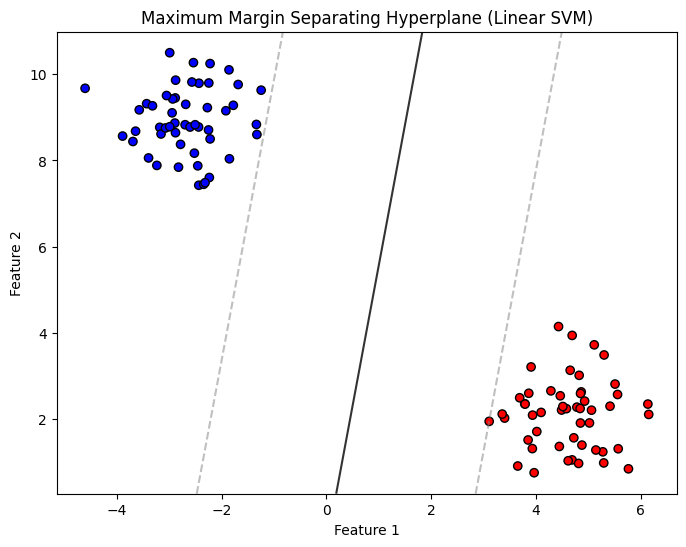

In [5]:
def fit_linear_svm(X, y, lr=0.001, epochs=10000, C=1e5):
    n_samples, n_features = X.shape
    y_ = np.where(y == 0, -1, 1)  

    w = np.zeros(n_features)
    b = 0

    for epoch in range(epochs):
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, w) + b) >= 1
            if condition:
                w -= lr * (2 * 1/C * w)
            else:
                w -= lr * (2 * 1/C * w - np.dot(x_i, y_[idx]))
                b -= lr * y_[idx]
    return w, b

# fits the svm
w, b = fit_linear_svm(X, y)

#plots
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = (xy @ w + b).reshape(XX.shape)

# creates decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.8, linestyles=['-'])
ax.contour(XX, YY, Z, colors='grey', levels=[-1, 1], alpha=0.5, linestyles=['--', '--'])

plt.title("Maximum Margin Separating Hyperplane (Linear SVM)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

 Removing the closest support vector, redoing the task, plot to see the change in the graph.

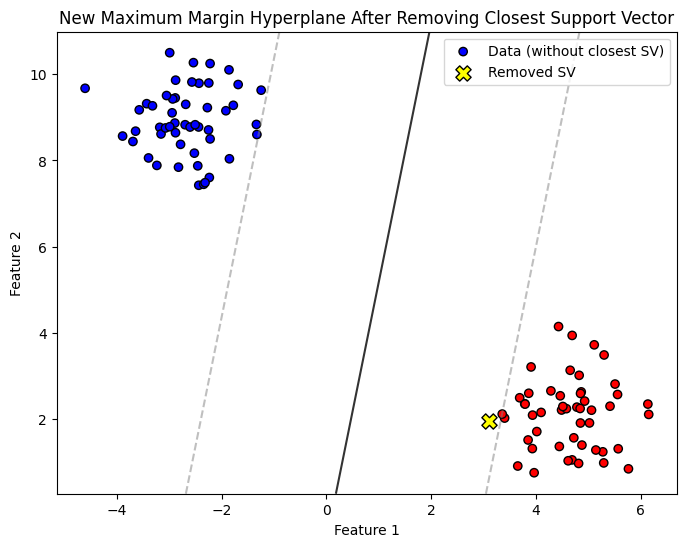

In [6]:
def point_distances(X, w, b):
    return np.abs(X @ w + b) / np.linalg.norm(w)

# removes the closest support vector
distances = point_distances(X, w, b)
closest_idx = np.argmin(distances)
X_new = np.delete(X, closest_idx, axis=0)
y_new = np.delete(y, closest_idx, axis=0)

# refit the svm 
w_new, b_new = fit_linear_svm(X_new, y_new)

# plots
plt.figure(figsize=(8, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap='bwr', edgecolors='k', label='Data (without closest SV)')
plt.scatter(X[closest_idx, 0], X[closest_idx, 1], c='yellow', edgecolors='black', s=120, marker='X', label='Removed SV')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z_new = (xy @ w_new + b_new).reshape(XX.shape)

# decision boundary
ax.contour(XX, YY, Z_new, colors='k', levels=[0], alpha=0.8, linestyles=['-'])
ax.contour(XX, YY, Z_new, colors='grey', levels=[-1, 1], alpha=0.5, linestyles=['--', '--'])

plt.title("New Maximum Margin Hyperplane After Removing Closest Support Vector")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

By removing the closest support vector, we can see that the the maximum margin has shifted to a new closest support vector on the "red" side which shifts the margin even more into blue as well. This leads to it being farther away over all and means that there are chances for more errors. The main takeaway should be that just one support vector can have giant consequences for our svm models. 